In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import warnings

In [3]:
# Đọc dữ liệu
warnings.simplefilter(action='ignore', category=Warning)

pd.set_option('display.max_columns', None)
df = pd.read_csv("Data_Group10.csv", index_col=False)
df.head()

,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content
0,0,"J. of Clarksville, VA",14 people,5,"Original review: March 20, 2021",I have been very happy using Amazon.com for ye...
1,1,"Wanda of Clearwater, FL",8 people,5,"Original review: Jan. 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ..."
2,2,"Kobi of Denver, CO",4 people,5,"Original review: Jan. 9, 2021","Like most anyone who uses the internet, I freq..."
3,3,"Chris of Dallas, TX",7 people,5,"Original review: Dec. 25, 2020",I've made several orders with them and got a b...
4,4,"Alejandra of Woodland Hills, CA",2 people,4,"Original review: Dec. 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...


In [4]:
df.isnull().sum()

Unnamed: 0               0
author_name              0
number_helpful_votes     0
rating                   0
review_date              0
review_content          30
dtype: int64

In [5]:
df=df.dropna()
df = df[df['rating'] !='none']

In [6]:
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

Unnamed: 0              0
author_name             0
number_helpful_votes    0
rating                  0
review_date             0
review_content          0
dtype: int64

In [7]:
#df['review_date']=df['review_date']-'Original review: '
df['review_date'] = df['review_date'].str.replace('Original review: ','')
df['review_date'] = df['review_date'].str.replace('Resolution response: ','')
df['review_date'] = df['review_date'].str.replace('Jan','January')
df['review_date'] = df['review_date'].str.replace('Feb','February')
df['review_date'] = df['review_date'].str.replace('Aug','August')
df['review_date'] = df['review_date'].str.replace('Sept','September')
df['review_date'] = df['review_date'].str.replace('Oct','October')
df['review_date'] = df['review_date'].str.replace('Dec','December')
df['number_helpful_votes'] = df['number_helpful_votes'].str.replace('people','')
df['review_date'] = df['review_date'].str.replace('.','')
df['author_name'] = df['author_name'].str.replace('Ä°','A')
df['author_name'] = df['author_name'].str.replace('Ð','D')
df['author_name'] = df['author_name'].str.replace('Ñ','N')
df['author_name'] = df['author_name'].str.replace('€','')
df.head()

,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content
0,0,"J. of Clarksville, VA",14,5,"March 20, 2021",I have been very happy using Amazon.com for ye...
1,1,"Wanda of Clearwater, FL",8,5,"January 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ..."
2,2,"Kobi of Denver, CO",4,5,"January 9, 2021","Like most anyone who uses the internet, I freq..."
3,3,"Chris of Dallas, TX",7,5,"December 25, 2020",I've made several orders with them and got a b...
4,4,"Alejandra of Woodland Hills, CA",2,4,"December 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...


In [8]:
# NLP Pre-Processing

In [9]:
import html

df['review_content']= html.unescape(df['review_content'])
df.head()

,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content
0,0,"J. of Clarksville, VA",14,5,"March 20, 2021",I have been very happy using Amazon.com for ye...
1,1,"Wanda of Clearwater, FL",8,5,"January 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ..."
2,2,"Kobi of Denver, CO",4,5,"January 9, 2021","Like most anyone who uses the internet, I freq..."
3,3,"Chris of Dallas, TX",7,5,"December 25, 2020",I've made several orders with them and got a b...
4,4,"Alejandra of Woodland Hills, CA",2,4,"December 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...


In [10]:
pattern = r"\&\#[0-9]+\;"

df["preprocessed"] = df['review_content'].str.replace(pat=pattern, repl="", regex=True)
df.head()

,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content,preprocessed
0,0,"J. of Clarksville, VA",14,5,"March 20, 2021",I have been very happy using Amazon.com for ye...,I have been very happy using Amazon.com for ye...
1,1,"Wanda of Clearwater, FL",8,5,"January 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ...","I have the AmazonBasics Microwave, Small, 0.7 ..."
2,2,"Kobi of Denver, CO",4,5,"January 9, 2021","Like most anyone who uses the internet, I freq...","Like most anyone who uses the internet, I freq..."
3,3,"Chris of Dallas, TX",7,5,"December 25, 2020",I've made several orders with them and got a b...,I've made several orders with them and got a b...
4,4,"Alejandra of Woodland Hills, CA",2,4,"December 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...,Amazon Fresh in Woodland Hills is a very nicel...


In [11]:
%%time
import re
import nltk

from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk.corpus import wordnet

#import nltk resources
resources = ["wordnet", "stopwords", 'punkt',
             "averaged_perceptron_tagger", "maxent_treebank_pos_tagger"]

for resource in resources:
    try:
        nltk.data.find("tokenizers/" + resource)
    except LookupError:
        nltk.download(resource)


Wall time: 1.82 s


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


In [12]:
#create Lemmatizer object
lemma = WordNetLemmatizer()

def lemmatize_word(tagged_token):
    """ Returns lemmatized word given its tag"""
    root = []
    for token in tagged_token:
        tag = token[1][0]
        word = token[0]
        if tag.startswith('J'):
            root.append(lemma.lemmatize(word, wordnet.ADJ))
        elif tag.startswith('V'):
            root.append(lemma.lemmatize(word, wordnet.VERB))
        elif tag.startswith('N'):
            root.append(lemma.lemmatize(word, wordnet.NOUN))
        elif tag.startswith('R'):
            root.append(lemma.lemmatize(word, wordnet.ADV))
        else:          
            root.append(word)
    return root
def lemmatize_doc(document):
    """ Tags words then returns sentence with lemmatized words"""
    lemmatized_list = []
    tokenized_sent = sent_tokenize(document)
    for sentence in tokenized_sent:
        no_punctuation = re.sub(r"[`'\",.!?()]", " ", sentence)
        tokenized_word = word_tokenize(no_punctuation)
        tagged_token = pos_tag(tokenized_word)
        lemmatized = lemmatize_word(tagged_token)
        lemmatized_list.extend(lemmatized)
    return " ".join(lemmatized_list)
#apply our functions
df["preprocessed"] = df["preprocessed"].astype(str).apply(lambda x: lemmatize_doc(x))
df

,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content,preprocessed
0,0,"J. of Clarksville, VA",14,5,"March 20, 2021",I have been very happy using Amazon.com for ye...,I have be very happy use Amazon com for year w...
1,1,"Wanda of Clearwater, FL",8,5,"January 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ...",I have the AmazonBasics Microwave Small 0 7 Cu...
2,2,"Kobi of Denver, CO",4,5,"January 9, 2021","Like most anyone who uses the internet, I freq...",Like most anyone who use the internet I freque...
3,3,"Chris of Dallas, TX",7,5,"December 25, 2020",I've made several orders with them and got a b...,I ve make several order with them and get a bu...
4,4,"Alejandra of Woodland Hills, CA",2,4,"December 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...,Amazon Fresh in Woodland Hills be a very nicel...
...,...,...,...,...,...,...,...
6786,6797,"Dennis of New Holstein, WI",2,2,"July 25, 2011",I purchased a Canon Pro 9500 Mark II printer f...,I purchase a Canon Pro 9500 Mark II printer fr...
6787,6798,"Rosalie of Belmopan, OTHER",3,5,"July 23, 2011","I paid a down payment on a vehicle, and was to...",I pay a down payment on a vehicle and be to ge...
6788,6799,"Karen of Kailua Kona , HI",4,1,"July 18, 2011",less than one star.,less than one star
6789,6883,"Rose of Union City, NJ",0,5,"May 1, 2010",I am writing to submit to the decision taken b...,I be write to submit to the decision take by A...


In [13]:
df

,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content,preprocessed
0,0,"J. of Clarksville, VA",14,5,"March 20, 2021",I have been very happy using Amazon.com for ye...,I have be very happy use Amazon com for year w...
1,1,"Wanda of Clearwater, FL",8,5,"January 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ...",I have the AmazonBasics Microwave Small 0 7 Cu...
2,2,"Kobi of Denver, CO",4,5,"January 9, 2021","Like most anyone who uses the internet, I freq...",Like most anyone who use the internet I freque...
3,3,"Chris of Dallas, TX",7,5,"December 25, 2020",I've made several orders with them and got a b...,I ve make several order with them and get a bu...
4,4,"Alejandra of Woodland Hills, CA",2,4,"December 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...,Amazon Fresh in Woodland Hills be a very nicel...
...,...,...,...,...,...,...,...
6786,6797,"Dennis of New Holstein, WI",2,2,"July 25, 2011",I purchased a Canon Pro 9500 Mark II printer f...,I purchase a Canon Pro 9500 Mark II printer fr...
6787,6798,"Rosalie of Belmopan, OTHER",3,5,"July 23, 2011","I paid a down payment on a vehicle, and was to...",I pay a down payment on a vehicle and be to ge...
6788,6799,"Karen of Kailua Kona , HI",4,1,"July 18, 2011",less than one star.,less than one star
6789,6883,"Rose of Union City, NJ",0,5,"May 1, 2010",I am writing to submit to the decision taken b...,I be write to submit to the decision take by A...


In [14]:
# Extracting the root word
  # Removing Accents

In [15]:
from unicodedata import normalize

remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df["preprocessed"] = df["preprocessed"].apply(remove_accent)
df["preprocessed"][1]

'I have the AmazonBasics Microwave Small 0 7 Cu Ft 700W Works with Alexa and I be very happy with it It take me a little while to adjust to the way it work but I be quite happy with it I don t use microwave very much so the small size be just perfect for me It hold a small dinner plate perfectly The height will accomodate my plate plus a 3 dome cover I don t ever have the problem with the set be wrong because Alex repeat my request back to me This have be easy to clean The only con I have with this microwave be if my Wifi be down I need to reset my microwave sometimes But this also mean my clock be set on its own the minute it be plug in'

In [16]:
# Removing Punctuations
pattern = r"[^\w\s]"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)
df["preprocessed"][1]

'I have the AmazonBasics Microwave Small 0 7 Cu Ft 700W Works with Alexa and I be very happy with it It take me a little while to adjust to the way it work but I be quite happy with it I don t use microwave very much so the small size be just perfect for me It hold a small dinner plate perfectly The height will accomodate my plate plus a 3 dome cover I don t ever have the problem with the set be wrong because Alex repeat my request back to me This have be easy to clean The only con I have with this microwave be if my Wifi be down I need to reset my microwave sometimes But this also mean my clock be set on its own the minute it be plug in'

In [17]:
# Converting to Lower Case

In [18]:
df["preprocessed"] = df["preprocessed"].str.lower()
df.head(10)

,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content,preprocessed
0,0,"J. of Clarksville, VA",14,5,"March 20, 2021",I have been very happy using Amazon.com for ye...,i have be very happy use amazon com for year w...
1,1,"Wanda of Clearwater, FL",8,5,"January 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ...",i have the amazonbasics microwave small 0 7 cu...
2,2,"Kobi of Denver, CO",4,5,"January 9, 2021","Like most anyone who uses the internet, I freq...",like most anyone who use the internet i freque...
3,3,"Chris of Dallas, TX",7,5,"December 25, 2020",I've made several orders with them and got a b...,i ve make several order with them and get a bu...
4,4,"Alejandra of Woodland Hills, CA",2,4,"December 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...,amazon fresh in woodland hills be a very nicel...
5,5,"Bo of Birmingham, AL",2,1,"October 7, 2021",I have been shopping on Amazon since 2012 and ...,i have be shop on amazon since 2012 and have e...
6,6,"Yeliz of İstanbul, Other",0,3,"October 7, 2021","İt is hard to complete shopping, delivery date...",it be hard to complete shop delivery date be c...
7,7,"Margaret of La Porte, IN",4,1,"October 3, 2021",This makes the 3rd time in just about a month ...,this make the 3rd time in just about a month t...
8,8,"George of Cedar Grove, NJ",4,1,"September 29, 2021",Amazon cheats and steals our money by selling ...,amazon cheat and steal our money by sell defec...
9,9,"Keith of Albany, NY",2,3,"September 29, 2021",I've been shopping with Amazon for about 10 ye...,i ve be shop with amazon for about 10 year mos...


In [19]:
# Removing Stop Words

In [20]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") \
                                          if token not in stop_words])
df["preprocessed"] = df["preprocessed"].apply(remove_stop_words)
df.head(10)

sample stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre', 'youve', 'youll', 'youd', 'your', 'yours'] 



,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content,preprocessed
0,0,"J. of Clarksville, VA",14,5,"March 20, 2021",I have been very happy using Amazon.com for ye...,happy use amazon com year issue recently appea...
1,1,"Wanda of Clearwater, FL",8,5,"January 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ...",amazonbasics microwave small 0 7 cu ft 700w wo...
2,2,"Kobi of Denver, CO",4,5,"January 9, 2021","Like most anyone who uses the internet, I freq...",like anyone use internet frequently use amazon...
3,3,"Chris of Dallas, TX",7,5,"December 25, 2020",I've made several orders with them and got a b...,make several order get bunch stuff free gift c...
4,4,"Alejandra of Woodland Hills, CA",2,4,"December 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...,amazon fresh woodland hills nicely lay store f...
5,5,"Bo of Birmingham, AL",2,1,"October 7, 2021",I have been shopping on Amazon since 2012 and ...,shop amazon since 2012 enjoy shopping amazon r...
6,6,"Yeliz of İstanbul, Other",0,3,"October 7, 2021","İt is hard to complete shopping, delivery date...",hard complete shop delivery date confuse bold ...
7,7,"Margaret of La Porte, IN",4,1,"October 3, 2021",This makes the 3rd time in just about a month ...,make 3rd time month order amazon give delivery...
8,8,"George of Cedar Grove, NJ",4,1,"September 29, 2021",Amazon cheats and steals our money by selling ...,amazon cheat steal money sell defective item g...
9,9,"Keith of Albany, NY",2,3,"September 29, 2021",I've been shopping with Amazon for about 10 ye...,shop amazon 10 year time receive order deliver...


In [21]:
# Removing Extra Spaces

In [22]:
pattern = r"[\s]+"

df["preprocessed"] = df["preprocessed"].str.replace(pat=pattern, repl=" ", regex=True)

df

,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content,preprocessed
0,0,"J. of Clarksville, VA",14,5,"March 20, 2021",I have been very happy using Amazon.com for ye...,happy use amazon com year issue recently appea...
1,1,"Wanda of Clearwater, FL",8,5,"January 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ...",amazonbasics microwave small 0 7 cu ft 700w wo...
2,2,"Kobi of Denver, CO",4,5,"January 9, 2021","Like most anyone who uses the internet, I freq...",like anyone use internet frequently use amazon...
3,3,"Chris of Dallas, TX",7,5,"December 25, 2020",I've made several orders with them and got a b...,make several order get bunch stuff free gift c...
4,4,"Alejandra of Woodland Hills, CA",2,4,"December 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...,amazon fresh woodland hills nicely lay store f...
...,...,...,...,...,...,...,...
6786,6797,"Dennis of New Holstein, WI",2,2,"July 25, 2011",I purchased a Canon Pro 9500 Mark II printer f...,purchase canon pro 9500 mark ii printer amazon...
6787,6798,"Rosalie of Belmopan, OTHER",3,5,"July 23, 2011","I paid a down payment on a vehicle, and was to...",pay payment vehicle get inspect test drive veh...
6788,6799,"Karen of Kailua Kona , HI",4,1,"July 18, 2011",less than one star.,less one star
6789,6883,"Rose of Union City, NJ",0,5,"May 1, 2010",I am writing to submit to the decision taken b...,write submit decision take amazon respected me...


In [23]:
# Tokenization

In [24]:
corpora = df["preprocessed"].values
df['tokenized'] = [corpus.split(" ") for corpus in corpora]
df.head(10)

,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content,preprocessed,tokenized
0,0,"J. of Clarksville, VA",14,5,"March 20, 2021",I have been very happy using Amazon.com for ye...,happy use amazon com year issue recently appea...,"[happy, use, amazon, com, year, issue, recentl..."
1,1,"Wanda of Clearwater, FL",8,5,"January 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ...",amazonbasics microwave small 0 7 cu ft 700w wo...,"[amazonbasics, microwave, small, 0, 7, cu, ft,..."
2,2,"Kobi of Denver, CO",4,5,"January 9, 2021","Like most anyone who uses the internet, I freq...",like anyone use internet frequently use amazon...,"[like, anyone, use, internet, frequently, use,..."
3,3,"Chris of Dallas, TX",7,5,"December 25, 2020",I've made several orders with them and got a b...,make several order get bunch stuff free gift c...,"[make, several, order, get, bunch, stuff, free..."
4,4,"Alejandra of Woodland Hills, CA",2,4,"December 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...,amazon fresh woodland hills nicely lay store f...,"[amazon, fresh, woodland, hills, nicely, lay, ..."
5,5,"Bo of Birmingham, AL",2,1,"October 7, 2021",I have been shopping on Amazon since 2012 and ...,shop amazon since 2012 enjoy shopping amazon r...,"[shop, amazon, since, 2012, enjoy, shopping, a..."
6,6,"Yeliz of İstanbul, Other",0,3,"October 7, 2021","İt is hard to complete shopping, delivery date...",hard complete shop delivery date confuse bold ...,"[hard, complete, shop, delivery, date, confuse..."
7,7,"Margaret of La Porte, IN",4,1,"October 3, 2021",This makes the 3rd time in just about a month ...,make 3rd time month order amazon give delivery...,"[make, 3rd, time, month, order, amazon, give, ..."
8,8,"George of Cedar Grove, NJ",4,1,"September 29, 2021",Amazon cheats and steals our money by selling ...,amazon cheat steal money sell defective item g...,"[amazon, cheat, steal, money, sell, defective,..."
9,9,"Keith of Albany, NY",2,3,"September 29, 2021",I've been shopping with Amazon for about 10 ye...,shop amazon 10 year time receive order deliver...,"[shop, amazon, 10, year, time, receive, order,..."


In [25]:
# Phrase Modeling: N-gram
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(df['tokenized'], min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[df['tokenized']], min_count=300, threshold=50)

In [26]:
# Unigrams

uni_gram_tokens = set([token for text in df['tokenized'] for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['pad', 'hue', 'sell', 'skagen', 'withhold', 'washer', 'stockman', 'spiral', 'wastage', 'switches', 'nike', 'marketplace', 'individual', 'bear', 'regarding', 'severely', 'cheating', 'ruchitha', 'sign', 'sporadically', 'shopper', 'jack', 'devoted', 'crowd', 'context', 'foolishness', 'strike', 'purchase', 'ryobi', 'ps2', 'australia', 'schematic', 'qla', 'pitambari', 'tools', 'pmts', 'redirected', 'europe', 'barbecue', '7pm', '1499', 'walking', 'speed', 'mink', 'convey', 'prove', 'wallet', 'impossibility', 'steer', 'indonesia']


In [27]:
# Bigrams

bigram_min = bi_gram.min_count

bi_condition = lambda x: x[1] >= bigram_min

bi_gram_tokens = dict(filter(bi_condition, bi_gram.vocab.items()))
bi_gram_tokens = set([token \
                      for token in bi_gram_tokens])
bi_grams_only = bi_gram_tokens.difference(uni_gram_tokens)
print(list(bi_grams_only)[:50])

['amazon_com', 'customer_service', 'two_day', 'gift_card', 'use_amazon', 'prime_membership', '2_day', 'prime_member', 'free_shipping', 'amazon_customer', 'order_amazon', 'credit_card', 'contact_amazon', 'place_order', 'amazon_prime', 'call_amazon']


In [28]:
# Trigrams
trigram_min = tri_gram.min_count

tri_condition = lambda x: x[1] >= trigram_min

tri_gram_tokens = dict(filter(tri_condition, tri_gram.vocab.items()))
tri_gram_tokens = set([token \
                       for token in tri_gram_tokens])

tri_grams_only = tri_gram_tokens.difference(bi_gram_tokens)
print(list(tri_grams_only)[:50])

[]


In [29]:
df['tokenized'] = [list(filter(lambda x: len(x) > 1, document)) \
             for document in df['tokenized']]

df

,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content,preprocessed,tokenized
0,0,"J. of Clarksville, VA",14,5,"March 20, 2021",I have been very happy using Amazon.com for ye...,happy use amazon com year issue recently appea...,"[happy, use, amazon, com, year, issue, recentl..."
1,1,"Wanda of Clearwater, FL",8,5,"January 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ...",amazonbasics microwave small 0 7 cu ft 700w wo...,"[amazonbasics, microwave, small, cu, ft, 700w,..."
2,2,"Kobi of Denver, CO",4,5,"January 9, 2021","Like most anyone who uses the internet, I freq...",like anyone use internet frequently use amazon...,"[like, anyone, use, internet, frequently, use,..."
3,3,"Chris of Dallas, TX",7,5,"December 25, 2020",I've made several orders with them and got a b...,make several order get bunch stuff free gift c...,"[make, several, order, get, bunch, stuff, free..."
4,4,"Alejandra of Woodland Hills, CA",2,4,"December 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...,amazon fresh woodland hills nicely lay store f...,"[amazon, fresh, woodland, hills, nicely, lay, ..."
...,...,...,...,...,...,...,...,...
6786,6797,"Dennis of New Holstein, WI",2,2,"July 25, 2011",I purchased a Canon Pro 9500 Mark II printer f...,purchase canon pro 9500 mark ii printer amazon...,"[purchase, canon, pro, 9500, mark, ii, printer..."
6787,6798,"Rosalie of Belmopan, OTHER",3,5,"July 23, 2011","I paid a down payment on a vehicle, and was to...",pay payment vehicle get inspect test drive veh...,"[pay, payment, vehicle, get, inspect, test, dr..."
6788,6799,"Karen of Kailua Kona , HI",4,1,"July 18, 2011",less than one star.,less one star,"[less, one, star]"
6789,6883,"Rose of Union City, NJ",0,5,"May 1, 2010",I am writing to submit to the decision taken b...,write submit decision take amazon respected me...,"[write, submit, decision, take, amazon, respec..."


In [30]:
--Bag of word 

SyntaxError: invalid syntax (<ipython-input-30-774491c668a5>, line 1)

In [34]:
# Creating the Vocabulary

from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(df['tokenized'])

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: 19
ID: 1, Token: account
ID: 2, Token: amazon
ID: 3, Token: another
ID: 4, Token: appear
ID: 5, Token: balance
ID: 6, Token: bring
ID: 7, Token: card
ID: 8, Token: change
ID: 9, Token: charge


In [35]:
# Count-based Feature Engineering
# Bag of Words Model

In [36]:
bow = [vocabulary.doc2bow(doc) for doc in df['tokenized']]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: 19, Frequency: 2
Word: account, Frequency: 1
Word: amazon, Frequency: 3
Word: another, Frequency: 1
Word: appear, Frequency: 1
Word: balance, Frequency: 3
Word: bring, Frequency: 1
Word: card, Frequency: 3
Word: change, Frequency: 1
Word: charge, Frequency: 2
Word: chat, Frequency: 1
Word: chinese, Frequency: 1
Word: com, Frequency: 1
Word: compare, Frequency: 1
Word: competition, Frequency: 1
Word: continue, Frequency: 2
Word: country, Frequency: 1
Word: covid, Frequency: 2
Word: customer, Frequency: 1
Word: date, Frequency: 1
Word: due, Frequency: 2
Word: family, Frequency: 1
Word: get, Frequency: 1
Word: gift, Frequency: 3
Word: half, Frequency: 1
Word: happy, Frequency: 1
Word: hour, Frequency: 1
Word: issue, Frequency: 2
Word: item, Frequency: 1
Word: knee, Frequency: 1
Word: knock, Frequency: 1
Word: lately, Frequency: 1
Word: like, Frequency: 1
Word: likely, Frequency: 1
Word: may, Frequency: 1
Word: member, Frequency: 1
Word: method, Frequency: 1
Word: might, Frequency: 1

In [37]:
# TF-IDF Model

from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: 19, Weight: 0.208
Word: account, Weight: 0.046
Word: amazon, Weight: 0.011
Word: another, Weight: 0.062
Word: appear, Weight: 0.108
Word: balance, Weight: 0.321
Word: bring, Weight: 0.104
Word: card, Weight: 0.158
Word: change, Weight: 0.071
Word: charge, Weight: 0.111
Word: chat, Weight: 0.083
Word: chinese, Weight: 0.145
Word: com, Weight: 0.058
Word: compare, Weight: 0.100
Word: competition, Weight: 0.146
Word: continue, Weight: 0.182
Word: country, Weight: 0.107
Word: covid, Weight: 0.262
Word: customer, Weight: 0.024
Word: date, Weight: 0.067
Word: due, Weight: 0.154
Word: family, Weight: 0.100
Word: get, Weight: 0.024
Word: gift, Weight: 0.200
Word: half, Weight: 0.100
Word: happy, Weight: 0.087
Word: hour, Weight: 0.068
Word: issue, Weight: 0.102
Word: item, Weight: 0.026
Word: knee, Weight: 0.169
Word: knock, Weight: 0.132
Word: lately, Weight: 0.109
Word: like, Weight: 0.044
Word: likely, Weight: 0.128
Word: may, Weight: 0.082
Word: member, Weight: 0.059
Word: method, We

In [38]:
#word2Vec model 

In [39]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)
feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(df['tokenized'], window=context_size,
                            min_count=min_word)

Wall time: 1.38 s


In [40]:
word_vec_unpack = [(word, index) for word, index in \
                   word_vec.wv.key_to_index.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.vectors[indexes, :], index=tokens)

display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
amazon,-0.496649,0.169668,-0.096315,0.245786,0.306853,-0.636243,0.777282,0.355816,0.168390,-0.080907,-0.090068,-0.054449,-0.254956,0.249110,-0.177466,-0.748224,0.249300,-0.184298,-0.137193,-1.098790,0.156771,0.186991,-0.037741,-0.164002,-0.361126,-0.697650,-0.386259,-0.627174,-0.868109,0.371141,1.163383,0.302270,-0.022529,-0.568046,-0.566081,-0.212856,-0.136425,0.087065,-0.092801,-1.025517,0.150559,-0.244631,-0.341031,0.062559,-0.282130,-0.801674,-0.052296,-0.372108,0.711236,0.624512,0.348967,-0.350564,0.230597,-0.199238,-0.400420,-0.033200,0.691855,-0.342195,-0.869534,-0.097020,-0.294108,0.431986,-0.167669,-0.034560,-0.085463,0.381772,0.512904,0.469034,-1.297138,0.106747,0.324183,-0.580150,0.350578,-0.509999,0.483418,0.228318,0.789094,0.079295,-0.667235,-0.192097,-0.120923,-0.147617,-0.635618,1.192693,-0.447987,-0.681023,0.518126,0.495665,0.049733,0.425337,0.656293,0.133976,-0.123231,-0.030763,0.734246,0.541518,0.043719,-0.127341,0.110907,-0.206962
order,-0.297979,1.022933,1.511177,0.532144,0.586930,-0.659324,0.514266,2.298002,-0.917220,-1.686152,1.710942,-2.277473,-0.336048,-0.094326,1.167797,1.303756,-0.236555,0.603759,-0.644572,-1.512157,-0.856834,-0.213970,0.345319,-0.223122,-2.467593,0.821224,0.044675,0.073429,0.912568,1.514982,1.378533,-1.233365,0.608520,-1.314678,-1.401527,1.048228,1.730321,0.417602,0.020285,0.037033,0.934207,-1.963447,-0.568738,1.387359,0.152887,-0.059882,0.994373,0.223530,0.999952,-0.774527,0.798001,-0.762065,0.726795,0.069122,-0.478887,0.245242,1.151201,-0.206367,0.020583,-0.080042,-0.931665,-0.377566,1.268769,0.586621,0.085116,1.341899,1.135834,-0.225034,-1.343818,0.984080,-0.014689,-1.500025,0.902419,1.112099,0.386548,1.055259,-0.182766,-0.173626,-0.354641,-0.364716,-0.366795,-0.209014,0.405329,-0.501556,-1.247700,0.719715,0.241686,-0.487662,0.660152,1.399736,0.510652,-0.115026,-0.791692,0.229951,1.040462,-0.446179,0.065384,-0.508453,0.819416,0.326661
item,-0.260097,1.197802,1.027938,0.615956,0.301324,-1.225338,1.539799,1.166215,-1.700129,-1.490066,0.271936,-2.104752,1.459893,-0.493342,1.158211,-0.853599,1.213652,-0.276324,-1.227288,-1.758191,-0.078990,-1.101214,-0.736844,-1.050549,-1.616678,0.458459,-0.046527,-0.634345,0.839124,1.615322,1.445348,-0.614111,-0.295731,-1.985788,-1.411963,1.236240,0.406419,1.631058,0.253240,-0.738738,-0.550968,-0.578699,0.340923,1.563564,-0.770647,-0.307944,0.932939,-0.016052,0.506796,0.287090,0.479665,0.395950,0.693715,-1.221321,-0.076053,-0.552976,0.841070,0.210394,-0.558222,-0.176396,-0.375288,-1.136515,0.373889,-0.063323,-0.366652,0.407246,0.864745,0.886595,-1.289903,0.595308,0.751312,-1.574312,0.676904,0.399088,0.650729,0.707157,0.016769,0.783273,0.015796,0.893471,-0.718513,0.285076,-1.305446,0.204436,0.399207,-0.476366,0.087889,0.124321,1.388096,1.329438,-0.510506,0.386488,1.106414,-0.142207,1.252487,-0.138291,-0.485626,0.017069,1.132374,-0.139431
get,0.063808,1.574323,-0.377065,-0.910902,0.284451,-0.233144,1.108901,2.720202,0.533165,-0.107713,1.397898,-0.065175,-0.077517,-0.380554,-0.327384,-0.502006,-0.480869,-0.782127,-0.817662,-0.282289,0.611929,-0.779781,0.214282,0.009965,-0.940932,-0.428459,0.633797,-0.219006,-0.444722,0.251637,1.274931,-0.702643,0.555203,-0.287576,-0.562393,1.105073,0.807897,0.000660,-0.702363,-0.453943,0.934013,-1.170130,1.210788,0.047711,1.254650,0.463104,0.713707,-0.161216,-0.074955,0.740803,-0.055451,-0.191530,-0.664335,-0.299064,-1.371373,0.825151,0.585604,0.588972,-0.420135,-1.009330,0.590744,-0.439435,0.461160,-0.445333,-0.032074,0.382709,0.824002,-0.224175,-0.861140,0.707488,-0.159485,-0.220149,-0.289206,1.257068,-0.241649,0.107760,0.619447,0.170374,-0.406384,1.124880,-0.325925,0.058632,-0.506285,-0.014359,-0.398084,0.923389,1.173585,0.683283,-

In [41]:
%%time
tokenized_array = np.array(df['tokenized'])

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

Wall time: 5.13 s


In [42]:
model_df = pd.DataFrame(model_array)
model_df['label']=df["rating"].astype(int)
for i in range(len(model_df['label'])):
    if model_df['label'][i]<3:
        model_df['label'][i]=0
    else: model_df['label'][i]=1
display(model_df.head(100))
model_df['label'].unique()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,label
0,-0.105127,0.269240,-0.003577,-0.098144,0.492929,-0.582254,0.277153,1.233368,0.235606,-0.339141,0.303826,-0.466363,-0.533301,0.251919,-0.109779,0.093897,-0.508586,-0.102723,-0.017213,-1.235258,0.005081,-0.000677,0.360143,-0.073727,-0.477114,-0.365144,0.068025,-0.107813,-0.352593,0.279949,0.753649,-0.089360,0.414107,-0.353010,-0.304503,0.261415,0.228004,-0.042085,-0.144543,-0.822517,0.531249,-0.817903,-0.240822,0.211089,0.777312,-0.505250,0.175419,-0.376123,0.404503,0.380765,0.063122,-0.298167,0.128638,0.075836,-0.218840,0.062558,0.447590,-0.432909,-0.640049,0.033863,-0.108671,0.214928,0.229213,0.289826,-0.136637,0.249625,0.916691,0.675173,-1.056112,0.656733,-0.110343,-0.353851,0.489744,0.251885,0.353884,0.358836,0.468145,-0.315467,-0.449899,-0.127152,0.297327,-0.405571,-0.434199,0.532021,-0.379548,-0.074565,0.754101,0.282702,-0.127538,0.287154,0.473002,0.149228,-0.210966,0.415948,0.484478,0.485601,0.374511,-0.029317,0.334357,-0.125406,1
1,-0.206012,0.484799,-0.241994,-0.095537,0.125914,-0.606386,0.257573,0.964964,0.041346,-0.246748,-0.148619,-0.459324,-0.020547,0.054621,-0.128060,-0.484009,-0.157021,-0.441550,-0.231629,-0.609111,0.149407,-0.104408,0.084236,-0.229431,-0.144556,-0.129078,-0.004280,-0.292223,-0.377538,0.085891,0.443692,-0.027407,0.080257,-0.150775,-0.145544,0.355696,-0.069113,-0.081182,-0.120949,-0.722991,0.131303,-0.382168,0.008111,-0.085321,0.329926,-0.185064,-0.208700,-0.213825,-0.015723,0.344144,0.082252,-0.143182,-0.073558,-0.205742,-0.261424,0.105165,0.091103,-0.095203,-0.454736,-0.014972,0.122419,-0.092738,-0.211011,-0.159044,-0.138469,0.041166,0.362704,0.355755,-0.562775,0.490777,-0.013521,-0.064749,0.077972,0.026670,0.285097,0.106845,0.311097,-0.093137,-0.214928,0.272197,-0.197014,-0.084477,-0.498819,0.481782,-0.177148,-0.161536,0.423572,0.360417,0.232348,-0.023787,0.295926,0.179638,0.109095,0.259237,0.417760,0.339744,0.094817,-0.200869,0.138746,-0.086589,1
2,-0.222142,0.426251,-0.221465,-0.134959,0.301223,-0.554320,0.360745,1.094054,0.192617,-0.277260,0.062291,-0.354330,-0.335303,0.091077,-0.188551,-0.394916,-0.251325,-0.322307,-0.057976,-0.998500,0.069980,-0.038096,0.195401,-0.069875,-0.304119,-0.344656,-0.063952,-0.295346,-0.548340,0.113130,0.787360,0.108795,0.163086,-0.304081,-0.306096,0.262173,0.060909,-0.081087,-0.170439,-0.865595,0.367946,-0.571412,-0.126067,0.056661,0.439718,-0.437609,0.106592,-0.390986,0.232272,0.446393,0.112976,-0.206092,0.024815,-0.065992,-0.327670,0.088763,0.365472,-0.276811,-0.657170,-0.191462,0.073661,0.060423,0.005055,-0.015244,-0.127207,0.218714,0.585385,0.424389,-0.905003,0.479682,0.009809,-0.119417,0.192921,0.222199,0.375667,0.195405,0.514904,-0.117447,-0.399358,0.094982,0.025890,-0.196449,-0.531186,0.560610,-0.318227,-0.184093,0.715654,0.423968,-0.121633,0.077862,0.474582,0.059465,-0.105466,0.248242,0.486691,0.410162,0.302759,-0.156984,0.123964,-0.253671,1
3,-0.324396,0.708801,-0.186383,-0.064644,0.002390,-0.632700,0.374848,1.192927,-0.001499,-0.560601,0.116814,-0.727478,0.050168,-0.137281,0.066001,-0.443737,-0.096371,-0.385775,-0.122286,-0.572621,-0.066357,-0.175009,0.033733,-0.307638,-0.529832,-0.017447,-0.114637,-0.385833,-0.322328,0.263218,0.655355,0.061512,-0.117392,-0.268944,-0.286577,0.582774,0.179477,0.012055,-0.179336,-0.594818,0.410746,-0.635555,-0.007648,0.017041,0.078034,-0.273801,-0.005544,-0.133922,0.036806,0.181677,0.351470,-0.190967,0.013401,-0.206240,-0.576335,0.326258,0.219292,0.000546,-0.528017,-0.165651,0.188735,-0.158123,-0.003334,-0.226279,-0.010546,0.249483,0.283140,0.151020,-0.781005,0.486601,0.112109,-0.115216,0.095993,0.238099,0.469580,0.343141,0.335367,-0.097573,-0.194034,0.516418,-0.263267,-0.125105,-0.361948,0.320517,-0.258947,-0.153549,0.383452,0.

array([1, 0])

In [43]:
#Tran- Test splt


In [44]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(model_df.iloc[:, :-1], model_df.iloc[:, -1], test_size=0.2, random_state=42)

In [45]:
# Thuật toán

In [46]:
import time
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
print('Decision Trees')
start = time.time()
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion= 'gini')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
end = time.time()
print(classification_report(y_test, y_pred))
print( 'accuracy is' ,accuracy_score(y_pred,y_test)*100)
print('Actual Time: ',end-start)

Decision Trees
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       932
           1       0.76      0.80      0.78       427

    accuracy                           0.86      1359
   macro avg       0.83      0.84      0.83      1359
weighted avg       0.86      0.86      0.86      1359

accuracy is 85.5776306107432
Actual Time:  0.8445627689361572


<function matplotlib.pyplot.show(close=None, block=None)>

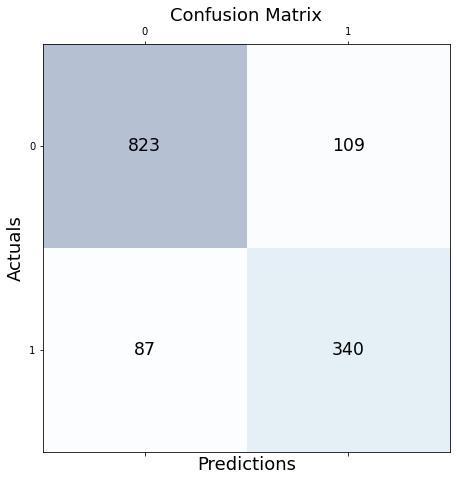

In [48]:
# Print the confusion matrix using Matplotlib
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show

In [49]:
print('\n Random Forest')
start = time.time()
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
end = time.time()
print(classification_report(y_test, y_pred))
print( 'accuracy is' ,accuracy_score(y_pred,y_test)*100)
print('Actual Time: ',end-start)


 Random Forest
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       932
           1       0.91      0.80      0.85       427

    accuracy                           0.91      1359
   macro avg       0.91      0.88      0.90      1359
weighted avg       0.91      0.91      0.91      1359

accuracy is 91.31714495952906
Actual Time:  7.053072214126587


<function matplotlib.pyplot.show(close=None, block=None)>

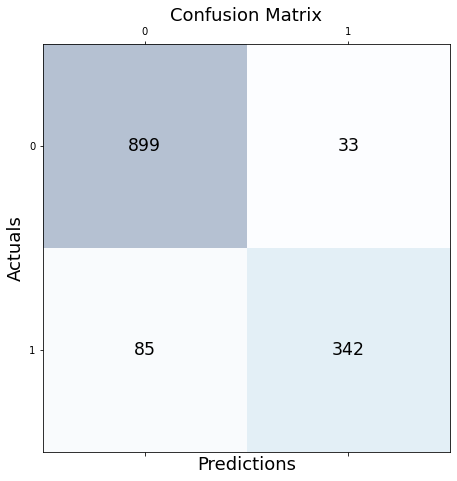

In [50]:
# Print the confusion matrix using Matplotlib
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show

In [51]:
print('\n Logistic Regression')
start = time.time()
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
from sklearn.metrics import accuracy_score
end = time.time()
print(classification_report(y_test, y_pred))
print('Accuracy is',accuracy_score(y_pred,y_test)*100)
print('Time',end-start)


 Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       932
           1       0.91      0.82      0.87       427

    accuracy                           0.92      1359
   macro avg       0.92      0.89      0.91      1359
weighted avg       0.92      0.92      0.92      1359

Accuracy is 92.05298013245033
Time 0.10172724723815918


<function matplotlib.pyplot.show(close=None, block=None)>

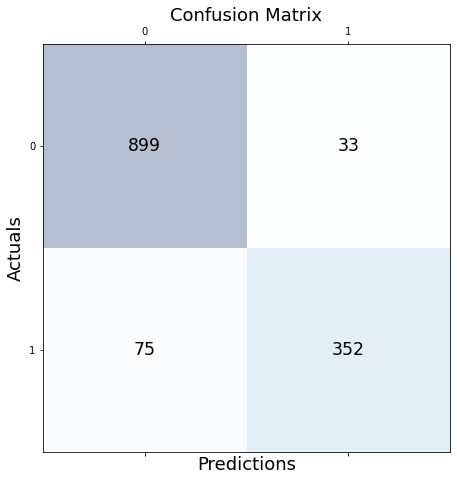

In [52]:
# Print the confusion matrix using Matplotlib
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show

In [53]:
print('\n Navie_Bayes')
start = time.time()
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import accuracy_score
end = time.time()
print(classification_report(y_test, y_pred))
print('accuracy is',accuracy_score(y_pred,y_test)*100)
print('Time',end-start)


 Navie_Bayes
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       932
           1       0.80      0.84      0.82       427

    accuracy                           0.88      1359
   macro avg       0.86      0.87      0.86      1359
weighted avg       0.88      0.88      0.88      1359

accuracy is 88.15305371596762
Time 0.014702796936035156


<function matplotlib.pyplot.show(close=None, block=None)>

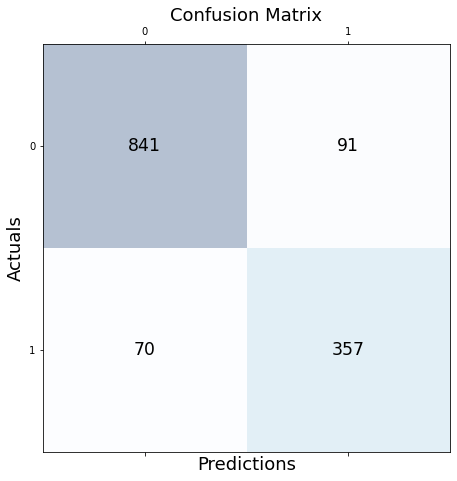

In [54]:
# Print the confusion matrix using Matplotlib
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show

In [55]:
#Topic Modeling
# 10 Topic 

In [56]:
import gensim
from gensim import corpora

# libraries for visualization : conda install -c conda-forge/label/gcc7 pyldavis
import pyLDAvis
import pyLDAvis.gensim

C:\Users\HP\anaconda3\lib\site-packages\funcy\colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
C:\Users\HP\anaconda3\lib\site-packages\funcy\colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
C:\Users\HP\anaconda3\lib\site-packages\funcy\colls.py:6: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import Mapping, Set, Iterable, Iterator, defaultdict
C:\Users\HP\anaconda3\lib\site-packages\funcy\colls.py:6: DeprecationWarning: Using or importing the ABCs from 'col

In [57]:
warnings.simplefilter(action='ignore', category=Warning)
dictionary = corpora.Dictionary(df['tokenized'])
doc_term_matrix = [dictionary.doc2bow (rev) for rev in df['tokenized']]

C:\Users\HP\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=20)

In [59]:
lda_model.print_topics()

[(0,
  '0.052*"amazon" + 0.021*"product" + 0.021*"item" + 0.020*"price" + 0.019*"like" + 0.018*"always" + 0.017*"great" + 0.017*"easy" + 0.017*"find" + 0.016*"good"'),
 (1,
  '0.059*"customer" + 0.037*"service" + 0.022*"company" + 0.019*"care" + 0.014*"december" + 0.014*"bad" + 0.012*"rude" + 0.012*"agent" + 0.011*"complaint" + 0.010*"team"'),
 (2,
  '0.062*"amazon" + 0.037*"seller" + 0.031*"product" + 0.030*"review" + 0.020*"return" + 0.019*"item" + 0.012*"purchase" + 0.011*"sell" + 0.010*"receive" + 0.009*"customer"'),
 (3,
  '0.136*"prime" + 0.043*"membership" + 0.040*"day" + 0.040*"service" + 0.039*"delivery" + 0.037*"member" + 0.034*"year" + 0.030*"customer" + 0.021*"time" + 0.017*"amazon"'),
 (4,
  '0.075*"order" + 0.043*"day" + 0.034*"amazon" + 0.029*"item" + 0.022*"say" + 0.020*"receive" + 0.018*"ship" + 0.016*"get" + 0.016*"would" + 0.015*"time"'),
 (5,
  '0.032*"tv" + 0.028*"watch" + 0.021*"movie" + 0.018*"2017" + 0.014*"stand" + 0.012*"behind" + 0.011*"subscribe" + 0.010*"mu

In [60]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.147798 -0.042275       1        1  20.802624
0      0.150951  0.079459       2        1  16.821212
7      0.145722 -0.002911       3        1  16.110111
4      0.162582 -0.050234       4        1  15.630515
2      0.089057 -0.092792       5        1  11.787168
8      0.035652 -0.017540       6        1   6.744266
3     -0.023935  0.233574       7        1   4.470341
1     -0.171441  0.145176       8        1   3.030681
9     -0.197325 -0.306095       9        1   2.962983
5     -0.339061  0.053637      10        1   1.640097, topic_info=           Term         Freq        Total Category  logprob  loglift
287       prime  2796.000000  2796.000000  Default  30.0000  30.0000
18     customer  3552.000000  3552.000000  Default  29.0000  29.0000
39        order  5460.000000  5460.000000  Default  28.0000  28.0000
114         day  3427.000000  3427.000000  Default  27.0000  27.0000
140      return  1922.000000  1922.000000  Default  26.0000  26.0000
...         ...          ...          ...      ...      ...      ...
750   difficult    35.465951    90.081559  Topic10  -4.9988   3.1783
2052     google    26.822465    48.514087  Topic10  -5.2782   3.5178
42        price    44.459331  1517.620829  Topic10  -4.7728   0.5801
2033    include    28.031120   213.958947  Topic10  -5.2341   2.0779
347      friend    22.504444   116.709673  Topic10  -5.4537   2.4644

[675 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
882       1  0.134586    00
882       3  0.667850    00
882       4  0.111732    00
882       9  0.086338    00
2233      9  0.952322   000
...     ...       ...   ...
63        1  0.132632  year
63        2  0.088698  year
63        3  0.338213  year
63        5  0.031500  year
63        7  0.407845  year

[1292 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 1, 8, 5, 3, 9, 4, 2, 10, 6])

In [ ]:
# rating chart 

In [61]:
A=df['rating'].value_counts().sort_index()
values=np.array(A)
rating=np.array(A.index)
print(rating)
print(values)

['1' '2' '3' '4' '5']
[4213  412  181  385 1600]


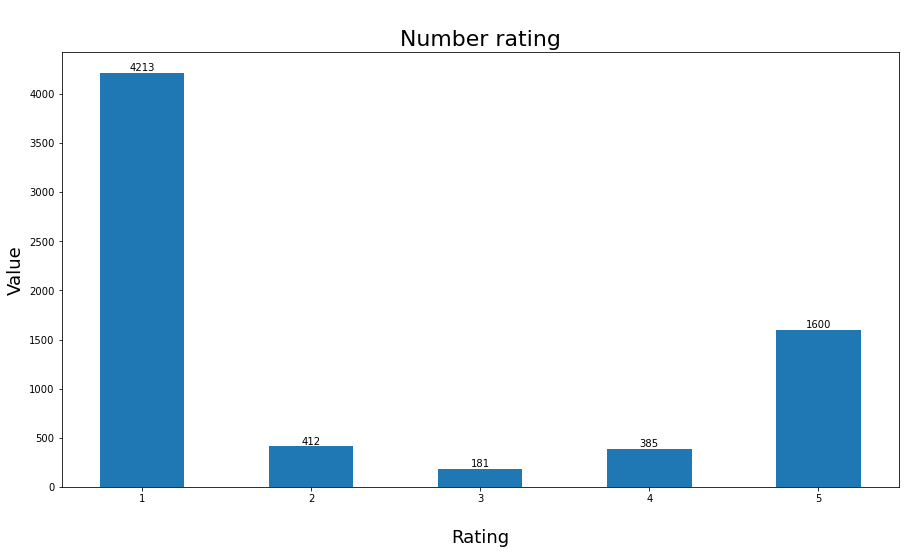

In [62]:
plt.figure(figsize=(15,8))
plt.bar(rating, values,width=0.5)
plt.title("\n Number rating ", fontsize=22)
plt.ylabel("Value", fontsize=18)
plt.xlabel("\nRating", fontsize=18)
for i in range(len(values)):
    plt.annotate(str(values[i]), xy=(rating[i],values[i]), ha='center', va='bottom')

In [63]:
# Biểu đồ thống kê tích cực và tiêu cực

In [64]:
A=model_df['label'].value_counts().sort_index()
value=np.array(A)
tag=np.array(A.index)
tag=['negative','positive']

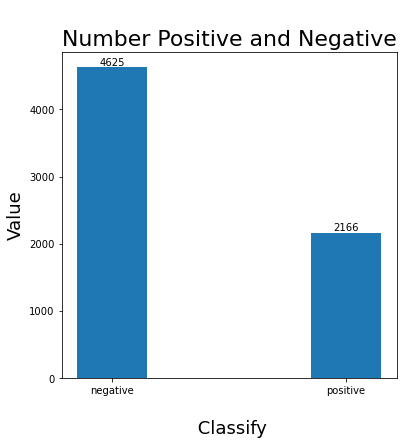

In [65]:
plt.figure(figsize=(6,6))
plt.bar(tag, value,width=0.3)
plt.title("\n Number Positive and Negative ", fontsize=22)
plt.ylabel("Value", fontsize=18)
plt.xlabel("\n Classify", fontsize=18)
for i in range(len(value)):
    plt.annotate(str(value[i]), xy=(tag[i],value[i]), ha='center', va='bottom')

In [66]:
# Word Cloud

In [67]:
df['label']=df["rating"].astype(int)
for i in range(len(df['label'])):
    if df['label'][i]<3:
        df['label'][i]=0
    else: df['label'][i]=1
display(df.head(100))
df['label'].unique()

,Unnamed: 0,author_name,number_helpful_votes,rating,review_date,review_content,preprocessed,tokenized,label
0,0,"J. of Clarksville, VA",14,5,"March 20, 2021",I have been very happy using Amazon.com for ye...,happy use amazon com year issue recently appea...,"[happy, use, amazon, com, year, issue, recentl...",1
1,1,"Wanda of Clearwater, FL",8,5,"January 9, 2021","I have the AmazonBasics Microwave, Small, 0.7 ...",amazonbasics microwave small 0 7 cu ft 700w wo...,"[amazonbasics, microwave, small, cu, ft, 700w,...",1
2,2,"Kobi of Denver, CO",4,5,"January 9, 2021","Like most anyone who uses the internet, I freq...",like anyone use internet frequently use amazon...,"[like, anyone, use, internet, frequently, use,...",1
3,3,"Chris of Dallas, TX",7,5,"December 25, 2020",I've made several orders with them and got a b...,make several order get bunch stuff free gift c...,"[make, several, order, get, bunch, stuff, free...",1
4,4,"Alejandra of Woodland Hills, CA",2,4,"December 4, 2020",Amazon Fresh in Woodland Hills is a very nicel...,amazon fresh woodland hills nicely lay store f...,"[amazon, fresh, woodland, hills, nicely, lay, ...",1
...,...,...,...,...,...,...,...,...,...
95,95,"Lucille of Fountain Valley, CA",2,5,"May 19, 2021",Convenience of shopping online with very reaso...,convenience shop online reasonable price outst...,"[convenience, shop, online, reasonable, price,...",1
96,96,"Carl of Virginia City, NV",6,2,"May 18, 2021",I've been wavering on dumping Amazon off and o...,waver dump amazon hate company politics strike...,"[waver, dump, amazon, hate, company, politics,...",0
97,97,"Erickson of Compton, CA",11,1,"May 17, 2021","Amazon is like a big bully, if the product is ...",amazon like big bully product right work fine ...,"[amazon, like, big, bully, product, right, wor...",0
98,98,"Donna of New Castle, NH",9,2,"May 11, 2021",I have been a Prime members for 10 years. I us...,prime member 10 year use receive item 2 3 day ...,"[prime, member, 10, year, use, receive, item, ...",0


array([1, 0])

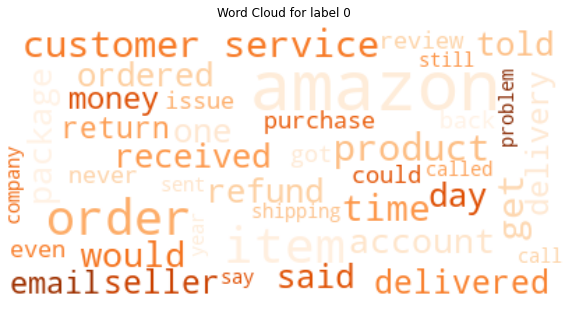

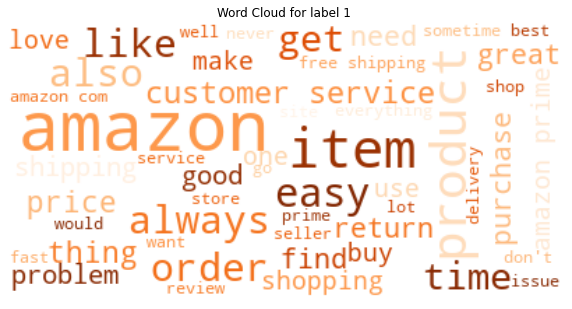

In [68]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(df[df["label"]==0]["review_content"].values).lower()
two_star_text = " ".join(df[df["label"]==1]["review_content"].values).lower()


text_list = [one_star_text, two_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for label {index} ")
    plt.axis("off")
    plt.show()

In [ ]:
#review by time

In [69]:
import datetime
df['review_date'] = pd.to_datetime(df['review_date'])

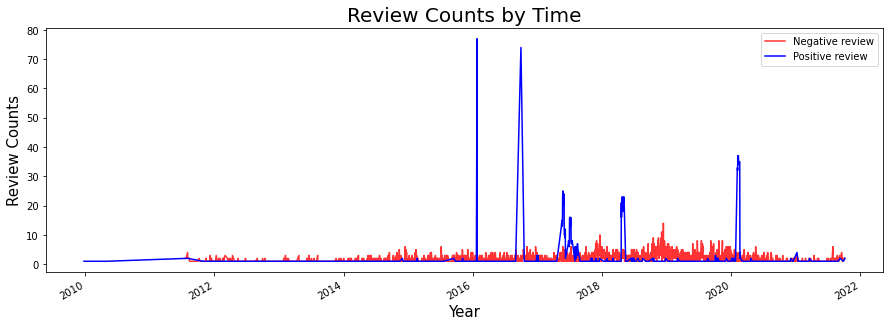

In [71]:
plt.figure(figsize=(15,5))
plt.title('Review Counts by Time',fontsize=20)
plt.ylabel('Review Counts',fontsize=15)
plt.xlabel('Year',fontsize=15)
df[df.label==0]['review_date'].value_counts().plot(label='Negative review',color='r',alpha=0.8)
df[df.label==1]['review_date'].value_counts().plot(label='Positive review',color='b')
plt.legend()
plt.show()